In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

Deep Learning Lib

In [3]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization, Activation,MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.applications.mobilenet import MobileNet,preprocess_input

In [4]:
base_model=MobileNet(input_shape=(224,224,3),include_top=False)
for layer in base_model.layers:
    layer.trainable=False
x=Flatten()(base_model.output)
x=Dense(units=7, activation='softmax')(x)
model= Model(base_model.input,x)

In [5]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [6]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255)
train_data=datagen.flow_from_directory(directory="C:/Users/Anushka/Desktop/anushka/course/ML/projects_vscode/emotion_detector/archive/train",target_size=(244,244),batch_size=32,)   
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [8]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_data=val_datagen.flow_from_directory(directory="C:/Users/Anushka/Desktop/anushka/course/ML/projects_vscode/emotion_detector/archive/train",target_size=(244,244), batch_size=32)


Found 28709 images belonging to 7 classes.


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

call_back=[es,mc]


In [18]:
history = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)

Epoch 1/30
10/10 [==============================] - 15s 1s/step - loss: 6.3472 - accuracy: 0.4531 - val_loss: 7.2941 - val_accuracy: 0.3711
Epoch 2/30
10/10 [==============================] - 14s 1s/step - loss: 6.8060 - accuracy: 0.3875 - val_loss: 5.9775 - val_accuracy: 0.4219
Epoch 3/30
10/10 [==============================] - 14s 1s/step - loss: 6.3265 - accuracy: 0.3688 - val_loss: 8.0502 - val_accuracy: 0.4219
Epoch 4/30
10/10 [==============================] - 16s 2s/step - loss: 8.4987 - accuracy: 0.3781 - val_loss: 4.4004 - val_accuracy: 0.4375
Epoch 5/30
10/10 [==============================] - 15s 2s/step - loss: 7.7095 - accuracy: 0.4437 - val_loss: 8.8686 - val_accuracy: 0.3789
Epoch 6/30
10/10 [==============================] - 16s 2s/step - loss: 7.0630 - accuracy: 0.3938 - val_loss: 4.0489 - val_accuracy: 0.5078
Epoch 7/30
10/10 [==============================] - 15s 2s/step - loss: 6.0507 - accuracy: 0.4187 - val_loss: 6.1248 - val_accuracy: 0.4961
Epoch 8/30
10/10 [==

In [16]:
from keras.models import load_model
model=load_model("C:/Users/Anushka/Desktop/anushka/course/ML/projects_vscode/emotion_detector/best_model.h5")

In [19]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

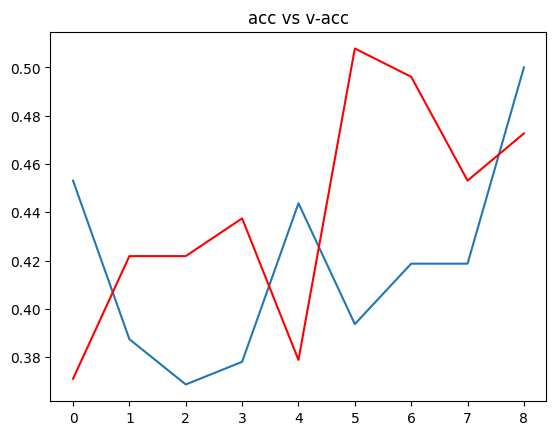

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()


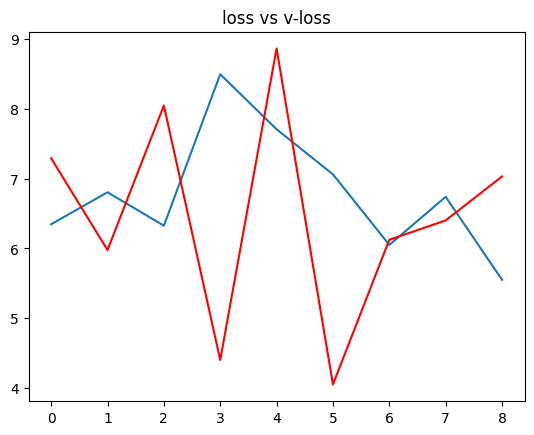

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v-loss')
plt.show()

In [22]:
op=dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))

In [29]:
path="C:/Users/Anushka/Desktop/anushka/course/ML/projects_vscode/emotion_detector/archive/test/happy/im11.png"
img=load_img(path,target_size=(224,224))

1/1 [==============================] - 0s 64ms/step
{'happy'}


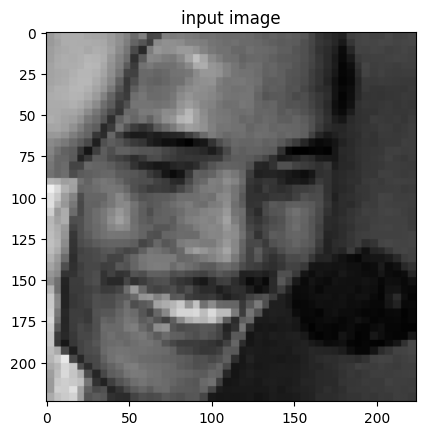

In [30]:
i=img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape
pred=np.argmax(model.predict(input_arr))
print({op[pred]})
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()